<a href="https://colab.research.google.com/github/rodrigofer89/Deep-Learning/blob/main/LSTM_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Aula - 21 - LSTM

Predições de ações com series temporais

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('NSE-TATAGLOBAL.csv')
df

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
...,...,...,...,...,...,...,...,...
2030,2010-07-27,117.60,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.10,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.80,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.30,122.00,120.25,120.75,120.90,293312,355.17


In [ ]:
# Puxando apenas a coluna do valor na ABERTURA
training_set = df.iloc[:,1:2].values

In [ ]:
type(training_set)

numpy.ndarray

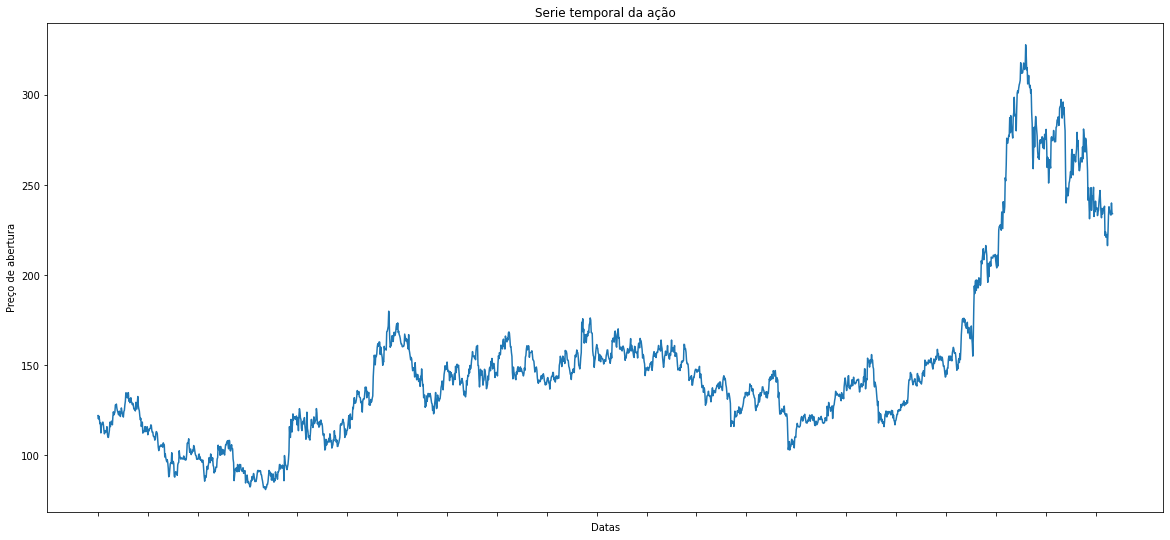

In [ ]:
# Plotar a série historica
plt.figure(figsize=(20, 9))
plt.plot(range(df.shape[0]),
         df['Open'][-1::-1])
plt.title('Serie temporal da ação')
plt.xticks(range(0, df['Date'].shape[0], 100),
           df['Date'].loc[-1:0:-100],
           rotation=45)

plt.xlabel('Datas')
plt.ylabel('Preço de abertura')
plt.show()

In [ ]:
# Padroziza os dados
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
training_set_scaled = mm.fit_transform(training_set)

In [ ]:
training_set_scaled

array([[0.6202352 ],
       [0.62226277],
       [0.64436334],
       ...,
       [0.16504461],
       [0.15896188],
       [0.16626115]])

In [ ]:
# Cria o dataset da serie temporal
X_train = []
y_train = []
for i in range(60, 2035):
  X_train.append( training_set_scaled[i-60:i ,0] )
  y_train.append( training_set_scaled[i, 0] )

X_train, y_train = np.array(X_train), np.array(y_train)

In [ ]:
X_train = np.reshape(X_train,(X_train.shape[0],
                              X_train.shape[1],
                              1))

In [ ]:
# Define a arquitetura da rede
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense

reg = Sequential()

reg.add( LSTM(units=50,
              return_sequences=True,
              input_shape=(X_train.shape[1], 1)) )
reg.add( Dropout(0.2) )

reg.add( LSTM(units=50,
              return_sequences=True) )
reg.add( Dropout(0.2) )

reg.add( LSTM(units=50,
              return_sequences=True) )
reg.add( Dropout(0.2) )

reg.add( LSTM(units=50) )
reg.add( Dropout(0.2) )

reg.add( Dense(units=1) )

In [ ]:
# Compila a rede montada
reg.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
reg.fit(X_train,
        y_train,
        epochs=100,
        batch_size=32)

In [ ]:
# Preparar os dados de teste nos mesmos moldes dos dados de treinamento
df_test = pd.read_csv('tatatest.csv')
real_stock_price = df_test.iloc[:,1:2].values

dataset_total = pd.concat((df['Open'],
                          df_test['Open']),
                          axis=0)

inputs = dataset_total[len(dataset_total)-len(df_test)-60:].values
inputs = inputs.reshape(-1, 1)
inputs = mm.transform(inputs)

X_test = []
for i in range(60, 76):
  X_test.append( inputs[i-60:i, 0] )

X_test = np.array(X_test)
X_test = np.reshape(X_test,
                    (X_test.shape[0], X_test.shape[1], 1))

In [ ]:
# Predizer valores das ações
predicted_stock_prices = reg.predict(X_test)

# Voltando os valores preditos na escala [0,1] para a escala original
predicted_stock_prices = mm.inverse_transform(predicted_stock_prices)

1/1 [==============================] - 1s 1s/step


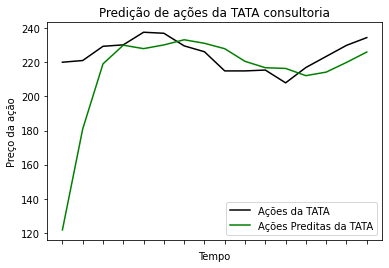

In [ ]:
# Mostrar os resultados
plt.plot(real_stock_price,
         color='black',
         label='Ações da TATA')
plt.plot(predicted_stock_prices,
         color='green',
         label='Ações Preditas da TATA')
plt.title('Predição de ações da TATA consultoria')
plt.xlabel('Tempo')
plt.xticks(range(0, df_test['Date'].shape[0]),
           df_test['Date'].loc[-1:0:-1],
           rotation=45)
plt.ylabel('Preço da ação')
plt.legend()
plt.show()